# Análise da Mega-Sena

## Será que podemos confiar na aleatoriedade do sorteio???

Em tempos de Terra Plana, surgiram também dúvidas sobre a idoneidade da Mega-Sena, modalidade de loteria da Caixa. 

Nesse notebook, iremos testar a probabilidade dos números da sorte da Mega, por meio da **Lei dos Grandes Números**. 

<img src="img/mega.jpg"/>

## Fonte de Dados

Recuperamos o histórico de todos os sorteios da Mega-Sena desde seu lançamento, em 1996.

In [1]:
import pandas as pd

In [2]:
sorteios = pd.read_excel('sorteios-mega.xlsx')
sorteios.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2142,13/04/2019,44,50,52,57,7,40
1,2141,10/04/2019,10,19,11,37,41,17
2,2140,06/04/2019,20,54,36,17,42,26
3,2139,03/04/2019,58,29,23,41,14,57
4,2138,30/03/2019,30,34,4,21,13,14


In [3]:
sorteios.sort_values(by=['Concurso'], inplace=True)

In [4]:
sorteios.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
2141,1,11/03/1996,41,5,4,52,30,33
2140,2,18/03/1996,9,39,37,49,43,41
2139,3,25/03/1996,36,30,10,11,29,47
2138,4,01/04/1996,6,59,42,27,1,5
2137,5,08/04/1996,1,19,46,6,16,2


## Qual a probabilidade esperada?

Queremos analisar se os números tem a mesma chance de aparecer em um sorteio. Para que isso aconteça, assumimos que um número tem 6 chances de ocorrer em um sorteio, estando entre a 1ª e 6ª bola sorteada:

In [5]:
prob = 1./60 + 1./59 + 1./58 + 1./57 + 1./56 + 1./55
prob

0.10444001920746823

## Vamos testar?

Abaixo, construiremos as probabilidades ao longo do tempo de cada número da Mega-Sena. Ou seja, verificaremos desde o primeiro concurso até o último, qual a probabilidade acumulada de cada número da sorte.

In [6]:
ls = []
for i in range(1, 61):
    qt = 0
    ttl = 0
    for j, linha in sorteios.iterrows():
        if linha['bola 1'] == i or linha['bola 2'] == i or linha['bola 3'] == i or \
           linha['bola 4'] == i or linha['bola 5'] == i or linha['bola 6'] == i:
            qt += 1
        ttl += 1
        ls.append({'numero': i, 'concurso': ttl, 'probabilidade': qt/float(ttl)})
df = pd.DataFrame(ls)

In [7]:
df.loc[df['numero'] == 1].head()

,concurso,numero,probabilidade
0,1,1,0.00
1,2,1,0.00
2,3,1,0.00
3,4,1,0.25
4,5,1,0.40


In [8]:
df.loc[df['numero'] == 1].tail()

,concurso,numero,probabilidade
2137,2138,1,0.099626
2138,2139,1,0.099579
2139,2140,1,0.099533
2140,2141,1,0.099486
2141,2142,1,0.099440


## Tá, mas e daí???

O resultado acima mostra o efeito da **Lei dos Grandes Números** (LGN) de *Chebyshev*:

Considerando $X_1, X_2, ...$ uma sequência infinita de variáveis aleatórias i.i.d. com valor esperado $E(X_1) = E(X_2) = ... = \mu$, ambas as versões da LGN determinam quase certamente que a média da amostra 

\begin{equation*}
\bar{X_n} = \frac{1}{n}(X_1 + ... + X_n)
\end{equation*}

converge para o valor esperado 

$\bar{X_n} \rightarrow \mu$ quando $n \rightarrow \infty$.




**Da LGN deduz–se que a probabilidade empírica de sucesso em uma série de uma distribuição de Bernoulli irá convergir para a probabilidade teórica.**

Fonte: [Wikipédia](https://pt.wikipedia.org/wiki/Lei_dos_grandes_n%C3%BAmeros), em 16/04/2017

## Não entendi! Desenha pra mim!

O gráfico abaixo mostra a evolução da probabilidade de um número da sorte, ao longo de todos os sorteios da Mega-Sena. Podemos observar que a aparição do número 01 tende para a probabilidade teórica (0,104), à medida que mais sorteios vão acontecendo. Essa estabilização acontece com todos os números: testa aí!

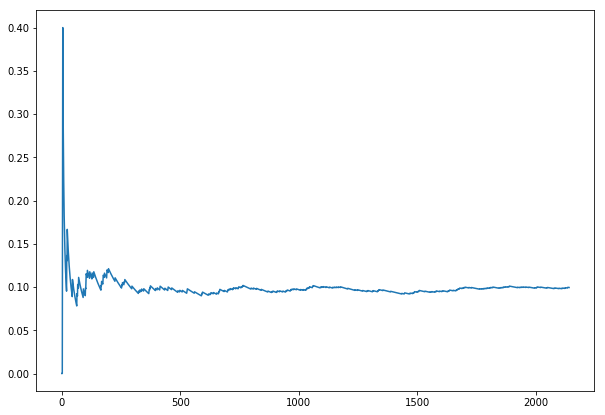

In [10]:
df.loc[df['numero'] == 1, 'probabilidade'].plot(figsize=(10,7));